In [107]:
from google.colab import drive
drive.mount('/content/drive')
# !ls /content/drive/My\ Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#### 這裡的路徑是放在我自己的drive

#### test_dir裡面要有七個資料夾 分別放測試圖片

In [109]:
test_dir = '/content/drive/MyDrive/dataset_test'

In [110]:
path_224 = "/content/drive/MyDrive/model/MobileNetV2_224_0.78.h5"
path_best = "/content/drive/MyDrive/model/mix_cam.h5"

In [130]:
import tensorflow as tf

model = tf.keras.models.load_model(path_best)
pixel = model.input_shape[2]
color = model.input_shape[3]

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 524,935 (2.00 MB)

 Trainable params: 523,975 (2.00 MB)

 Non-trainable params: 960 (3.75 KB)

#### 你的模型應該是 tf.random.normal(1,48,48,1) [連結文字](https://)

In [138]:
# 用假輸入測試模型
print(f"Model loaded from: {path_best}")
print(f"Expected input shape: {model.input_shape}")
print(f"Expected input size: {pixel}")
#dummy_input = tf.random.normal((1, pixel, pixel, 3))  # 假輸入（根據模型的輸入要求調整形狀）

dummy_input = tf.random.normal((1, pixel, pixel, 1)) # 你的應該是1,48,48,1
# output = model(dummy_input)
# print(output.shape)  # 應該匹配模型的最後輸出形狀
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Type: {type(layer)}")


Model loaded from: /content/drive/MyDrive/model/mix_cam.h5
Expected input shape: (None, 48, 48, 1)
Expected input size: 48
Layer 0: input_layer_27, Type: <class 'keras.src.layers.core.input_layer.InputLayer'>
Layer 1: conv_1, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Layer 2: batch_normalization_50, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
Layer 3: conv_2, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Layer 4: batch_normalization_51, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
Layer 5: max_pooling2d_38, Type: <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
Layer 6: dropout_49, Type: <class 'keras.src.layers.regularization.dropout.Dropout'>
Layer 7: conv_3, Type: <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Layer 8: batch_normalization_52, Type: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
Layer 9: max_pooling

In [137]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# 創建新的輸入層
new_input = Input(shape=model.input_shape[1:])  # 忽略 batch size 的維度

# 逐層將原始模型的層添加到新模型中
x = new_input
for layer in model.layers:
    x = layer(x)

# 創建新的 Functional 模型
model_with_input = Model(inputs=new_input, outputs=x)

# 檢查模型結構
model_with_input.summary()


TypeError: too many positional arguments

In [139]:
# 調整輸入數據的形狀
if dummy_input.shape[1:3] != model_with_input.input_shape[1:3]:
    dummy_input = tf.image.resize(dummy_input, (48, 48))
    print(f"Resized input shape: {dummy_input.shape}")

# 確保數據類型和值範圍正確
dummy_input = tf.cast(dummy_input, dtype=tf.float32) / 255.0
print(f"Input dtype: {dummy_input.dtype}, Input range: [{tf.reduce_min(dummy_input).numpy()}, {tf.reduce_max(dummy_input).numpy()}]")

# 測試模型輸出
try:
    output = model_with_input(dummy_input)
    print(f"Model output shape: {output.shape}")
except Exception as e:
    print(f"Error during model call: {e}")


Input dtype: <dtype: 'float32'>, Input range: [-0.013666410930454731, 0.012694037519395351]
Model output shape: (1, 7)


## 倒數兩行的last_conv_layer_name要放你上面summary的最後一層Conv層的名字

In [116]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # 使用虛擬輸入初始化模型
# dummy_input = np.random.random((1, 224, 224, 3)).astype(np.float32)
# _ = model.predict(dummy_input)

def grad_cam(model, image, last_conv_layer_name, pred_index=None):
    # 获取最后一层卷积层输出和模型预测
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])  # TensorFlow 的操作
        class_channel = predictions[:, pred_index]

    # 计算梯度
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 生成热力图
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)  # 使用 NumPy 操作完成归一化

    # 返回热力图和预测结果
    return heatmap, np.argmax(predictions[0])  # 使用 NumPy 的 argmax


# 生成 Grad-CAM 疊加圖像
def generate_grad_cam_image(original_image, heatmap, alpha=0.4, darkness=0.4):
    """
    生成 Grad-CAM 疊加圖像，並將原圖變暗以突出熱力圖。

    Parameters:
    - original_image: 原始圖像數據 (H, W, C)
    - heatmap: Grad-CAM 熱力圖
    - alpha: 疊加熱力圖的透明度
    - darkness: 原圖變暗程度 (0-1, 值越小越暗)

    Returns:
    - superimposed_img: 疊加後的圖像
    """
    heatmap = np.uint8(255 * heatmap)
    jet = plt.cm.get_cmap("jet")
    jet_heatmap = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_heatmap[heatmap]

    jet_heatmap = tf.image.resize(jet_heatmap, (original_image.shape[0], original_image.shape[1]))
    jet_heatmap = tf.convert_to_tensor(jet_heatmap)

    # 將原圖變暗
    darkened_image = original_image * darkness

    # 疊加熱力圖
    superimposed_img = jet_heatmap * alpha + darkened_image / 255.0
    superimposed_img = tf.clip_by_value(superimposed_img, 0, 1)
    return superimposed_img.numpy()

# 批量處理並以圖片網格方式顯示
def display_images_in_grid(base_folder, model, last_conv_layer_name, grid_size=(4, 4)):
    subfolders = [os.path.join(base_folder, subfolder) for subfolder in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, subfolder))]

    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))
    axes = axes.ravel()

    img_count = 0
    for subfolder in subfolders:
        for img_name in os.listdir(subfolder):
            if img_name.endswith(('.jpg', '.JPG', '.png', '.PNG')):
                img_path = os.path.join(subfolder, img_name)

                # 加載圖片，轉換為 224x224
                #img = load_img(img_path, target_size=(pixel, pixel))  # 修改目標尺寸為 224x224
                img = load_img(img_path, target_size=(pixel, pixel), color_mode="grayscale")  # 加載為灰度圖
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0) / 255.0

                # 生成 Grad-CAM
                heatmap, pred_index = grad_cam(model, img_array, last_conv_layer_name)
                print("Predicted class index:", pred_index)
                # 生成疊加圖片
                grad_cam_image = generate_grad_cam_image(img_to_array(img).astype(np.uint8), heatmap)

                # 顯示到網格
                axes[img_count].imshow(grad_cam_image)
                axes[img_count].set_title(f"{os.path.basename(subfolder)}: Class {pred_index}")
                axes[img_count].axis('off')

                img_count += 1
                if img_count >= grid_size[0] * grid_size[1]:
                    break
        if img_count >= grid_size[0] * grid_size[1]:
            break

    plt.tight_layout()
    plt.show()



In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),  # 壓縮圖片到 512X512
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Found 28 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7857 - loss: 0.0343
Test Loss: 0.03425834700465202
Test Accuracy: 0.7857142686843872


In [135]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    MaxPooling2D,
    Dropout,
    GlobalAveragePooling2D,
    Dense
)
from tensorflow.keras.models import Model

# 验证生成器类标签
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# 定义输入形状
input_shape = (48, 48, 1)  # 灰度图像

# 使用函数式 API 定义模型结构
def create_model():
    inputs = tf.keras.Input(shape=input_shape)

    # 构建网络结构
    x = Conv2D(32, kernel_size=(3, 3), activation='relu', name="conv_1")(inputs)
    x = BatchNormalization()(x)

    x = Conv2D(64, kernel_size=(3, 3), activation='relu', name="conv_2")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)

    x = Conv2D(128, kernel_size=(3, 3), activation='relu', name="conv_3")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)

    x = Conv2D(256, kernel_size=(3, 3), activation='relu', name="conv_4")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)

    # 使用全局平均池化代替 Flatten
    x = GlobalAveragePooling2D()(x)

    # 全连接层
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)

    # 输出层
    outputs = Dense(len(class_labels), activation='softmax')(x)

    # 构建模型
    model = Model(inputs=inputs, outputs=outputs)

    return model

# 创建模型
model = create_model()

# 加载训练好的权重
# 替换 'your_model_weights.h5' 为你的权重文件路径
model.load_weights(path_best)

# 编译模型（可选，主要用于评估和进一步训练）
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 打印模型结构
model.summary()


Model: "functional_305"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)          │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1 (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3 (Conv2D)                      │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_4 (Conv2D)                      │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_12          │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 7)                   │           3,5

 Total params: 524,935 (2.00 MB)

 Trainable params: 523,975 (2.00 MB)

 Non-trainable params: 960 (3.75 KB)

Predicted class index: 2
Predicted class index: 2


<ipython-input-116-a4e884614f5d>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap("jet")


Predicted class index: 2
Predicted class index: 4
Predicted class index: 6
Predicted class index: 6
Predicted class index: 6
Predicted class index: 6
Predicted class index: 0
Predicted class index: 0
Predicted class index: 0
Predicted class index: 5
Predicted class index: 5
Predicted class index: 5
Predicted class index: 5
Predicted class index: 5
Predicted class index: 1
Predicted class index: 1
Predicted class index: 4
Predicted class index: 1
Predicted class index: 5
Predicted class index: 4
Predicted class index: 4
Predicted class index: 5
Predicted class index: 3
Predicted class index: 3
Predicted class index: 4
Predicted class index: 3


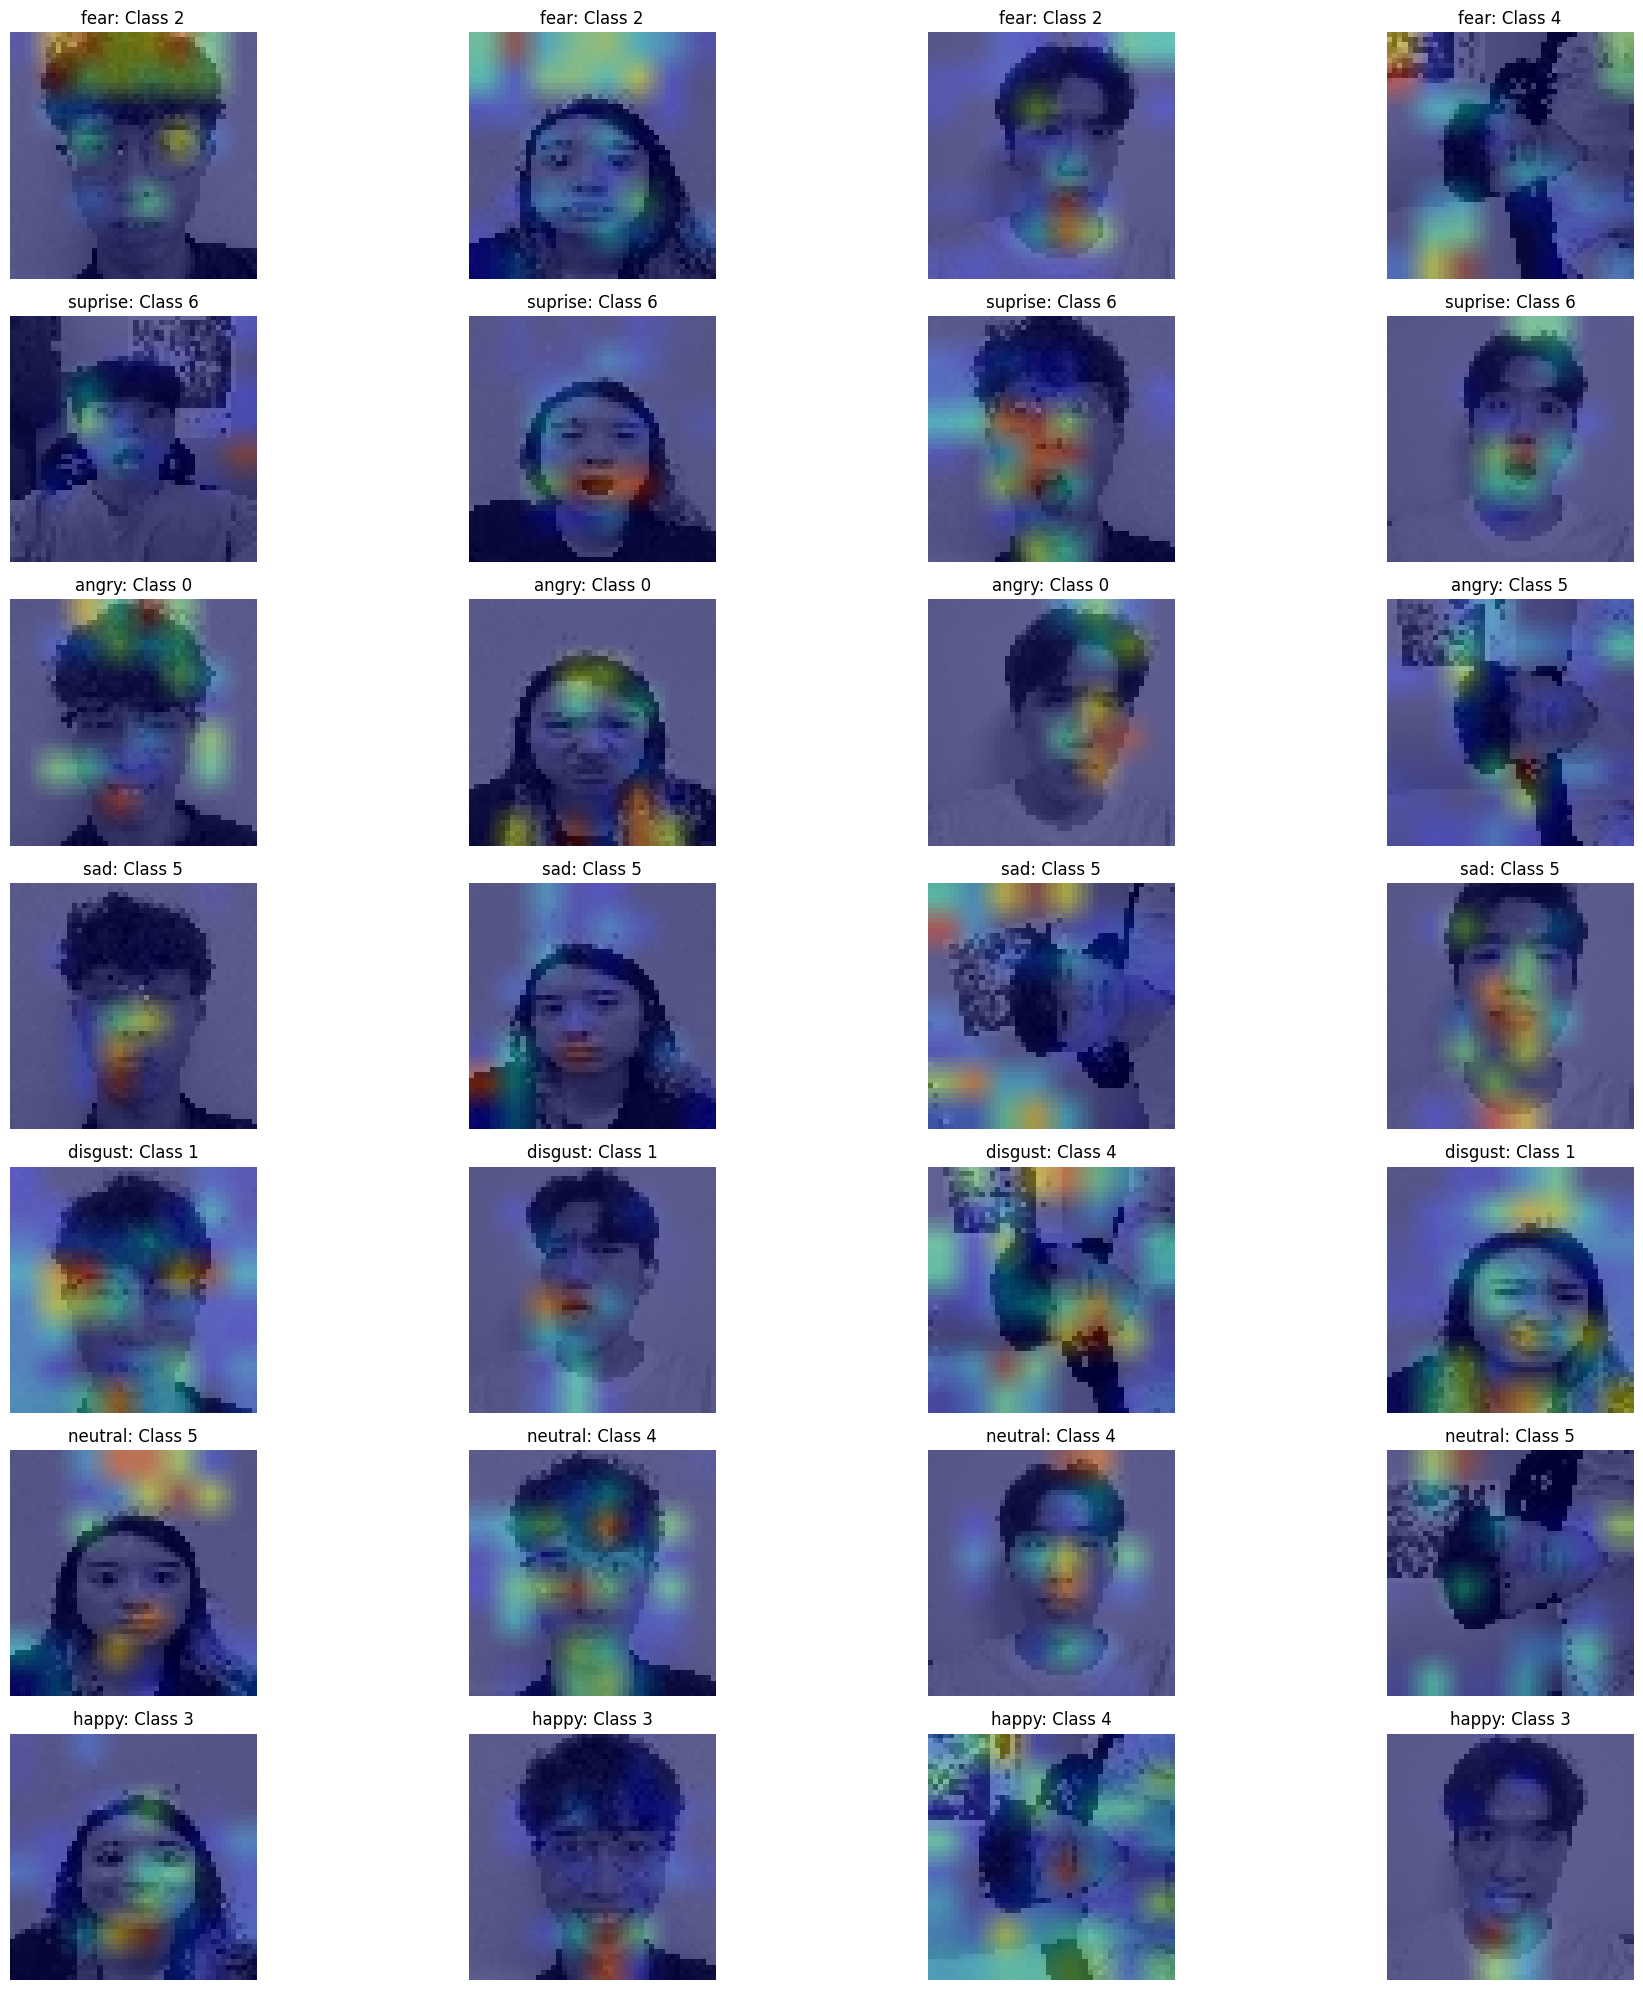

In [136]:

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# dummy_input = tf.random.normal((1, pixel, pixel, 1)) # 你的應該是1,48,48,1
# model(dummy_input)  # 將輸入傳遞到模型中
# 設定參數
base_folder = test_dir  # 主資料夾路徑，包含子資料夾
#last_conv_layer_name = "Conv_1"  # 模型的最後卷積層名稱，根據模型架構調整
last_conv_layer_name = "conv_4"
# 顯示 最後決定圖表行數列數
display_images_in_grid(base_folder, model, last_conv_layer_name, grid_size=(7, 4))